In [28]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('png')
plt.rcParams['figure.dpi'] = 300 
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (9, 3)
import pandas as pd
import numpy as np
import os


In [29]:
file_path = '/Users/youkipepper/Desktop/torch/data/data_hn/hn_02-04/hn_02-04_2024-02-25.csv'
file_name = os.path.splitext(os.path.basename(file_path))[0]
df = pd.read_csv(file_path, usecols = ['video_record_time', 'y'])
df


,video_record_time,y
0,2024-02-25 00:00:07.146146,498.690
1,2024-02-25 00:00:15.038038,498.806
2,2024-02-25 00:00:22.818818,498.509
3,2024-02-25 00:00:30.578578,498.703
4,2024-02-25 00:00:37.976976,498.737
...,...,...
4399,2024-02-25 09:14:43.578578,499.362
4400,2024-02-25 09:14:51.182182,499.423
4401,2024-02-25 09:14:58.813813,499.210
4402,2024-02-25 09:15:06.330000,499.232


In [30]:
def filter_data(df, column_name, z_threshold= 2, filter_step= 100, same_threshold=20):
    value_counts = df[column_name].value_counts()
    values_to_filter = value_counts[value_counts > same_threshold].index

    # 初始化过滤后的索引
    filtered_indices = []

    # 分段处理
    for start in range(0, len(df), filter_step):
        end = start + filter_step
        subset = df.iloc[start:end]

        # 计算Z分数
        mean = subset[column_name].mean()
        std = subset[column_name].std()

        if std == 0:  # 防止标准差为0时出错
            z_scores = np.zeros_like(subset[column_name], dtype=float)
        else:
            z_scores = np.abs((subset[column_name] - mean) / std)

        # 筛除异常值
        subset_filtered = subset[z_scores < z_threshold]

        # 筛除出现次数超过阈值的值
        subset_filtered = subset_filtered[~subset_filtered[column_name].isin(values_to_filter)]

        filtered_indices.extend(subset_filtered.index)

    return df.loc[filtered_indices]

In [31]:
df['video_record_time'] = pd.to_datetime(df['video_record_time'])
df['y'] = df['y'].astype(float)
df.set_index('video_record_time', inplace=True)

In [32]:
df_filtered = filter_data(df, 'y', filter_step= 100)
df_filtered = filter_data(df_filtered, 'y', filter_step= 1000)
df_filtered = filter_data(df_filtered, 'y', filter_step= 200)

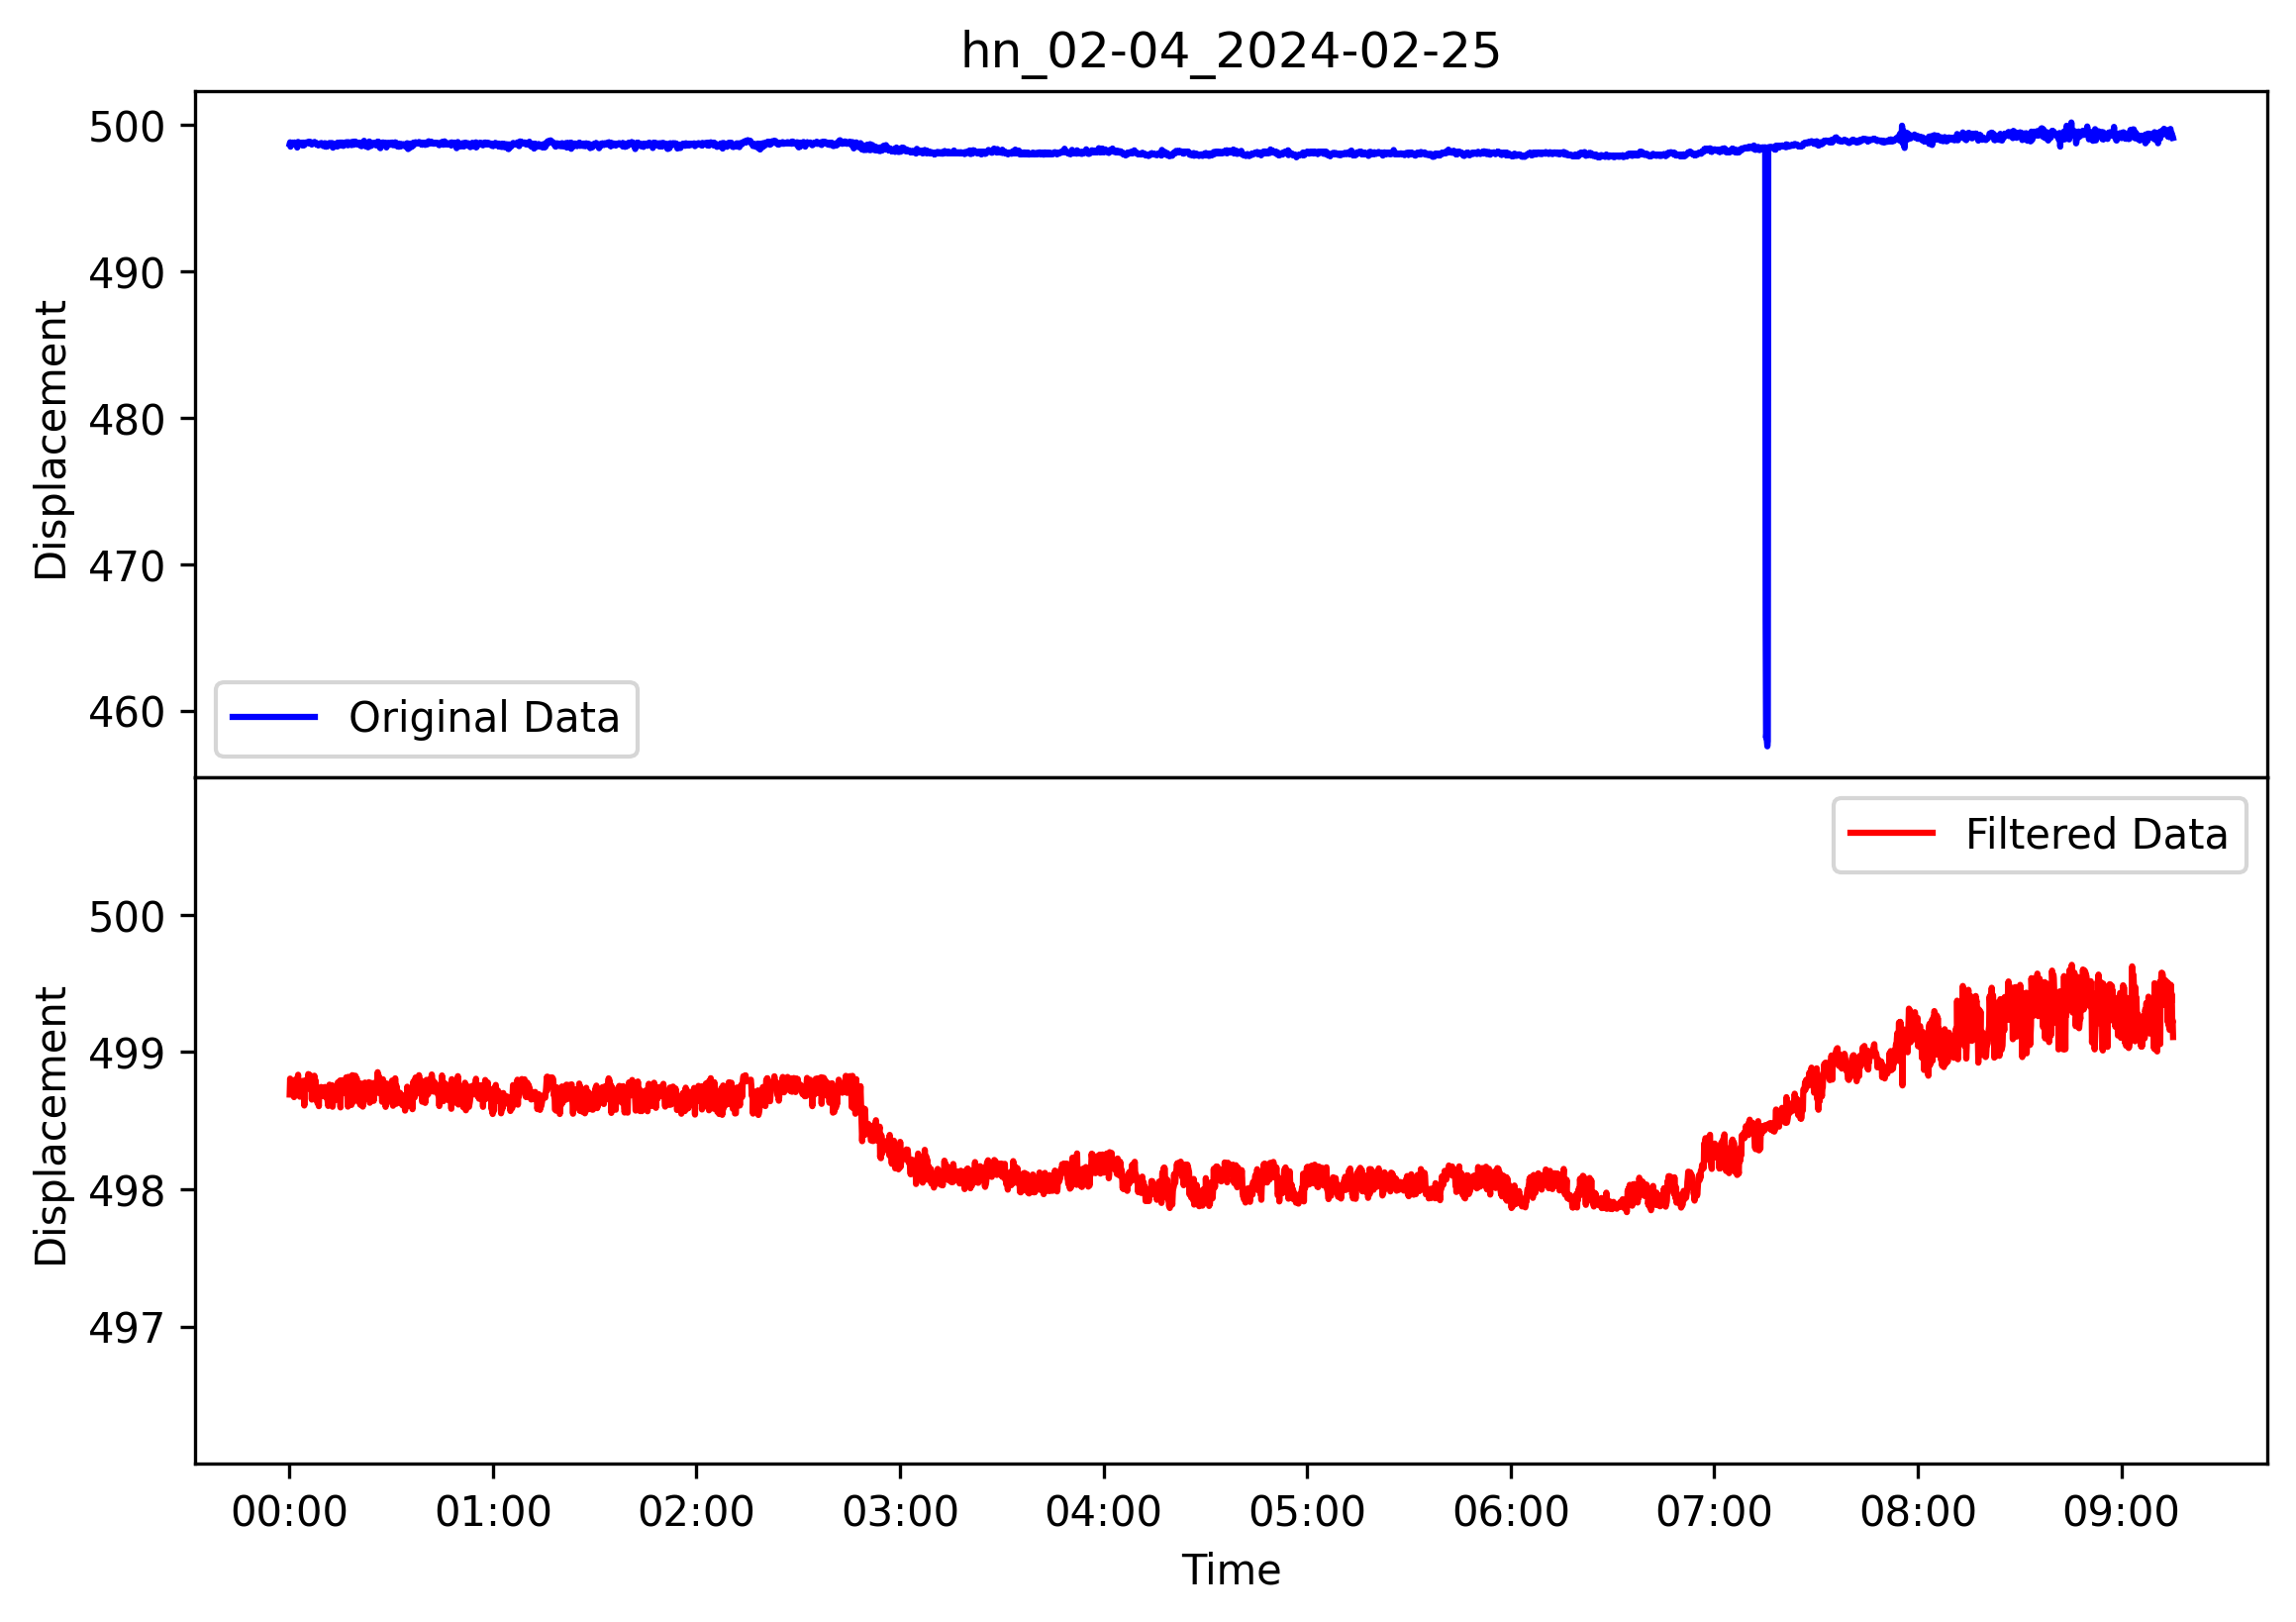

In [33]:
import matplotlib.dates as mdates
time_format = mdates.DateFormatter('%H:%M')

fig, axs = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(9, 6)
fig.subplots_adjust(hspace=0)

axs[0].plot(df.index, df.y, label='Original Data', color='blue')
axs[0].set_ylabel('Displacement')
axs[0].set_title(file_name)

axs[1].plot(df_filtered.index, df_filtered.y, label='Filtered Data', color='red')
axs[1].xaxis.set_major_formatter(time_format)
axs[1].set_yticks(np.arange(int(df_filtered.y.min()), int(df_filtered.y.max())+2, 1))
axs[1].set_ylim(int(df_filtered.y.min()-1), int(df_filtered.y.max()+1.5))
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Displacement')

axs[0].legend()
axs[1].legend()


In [34]:
print(df.shape[0])
print(df_filtered.shape[0])
print((df.shape[0] - df_filtered.shape[0])/df.shape[0]*100)

4404
3944
10.44504995458674


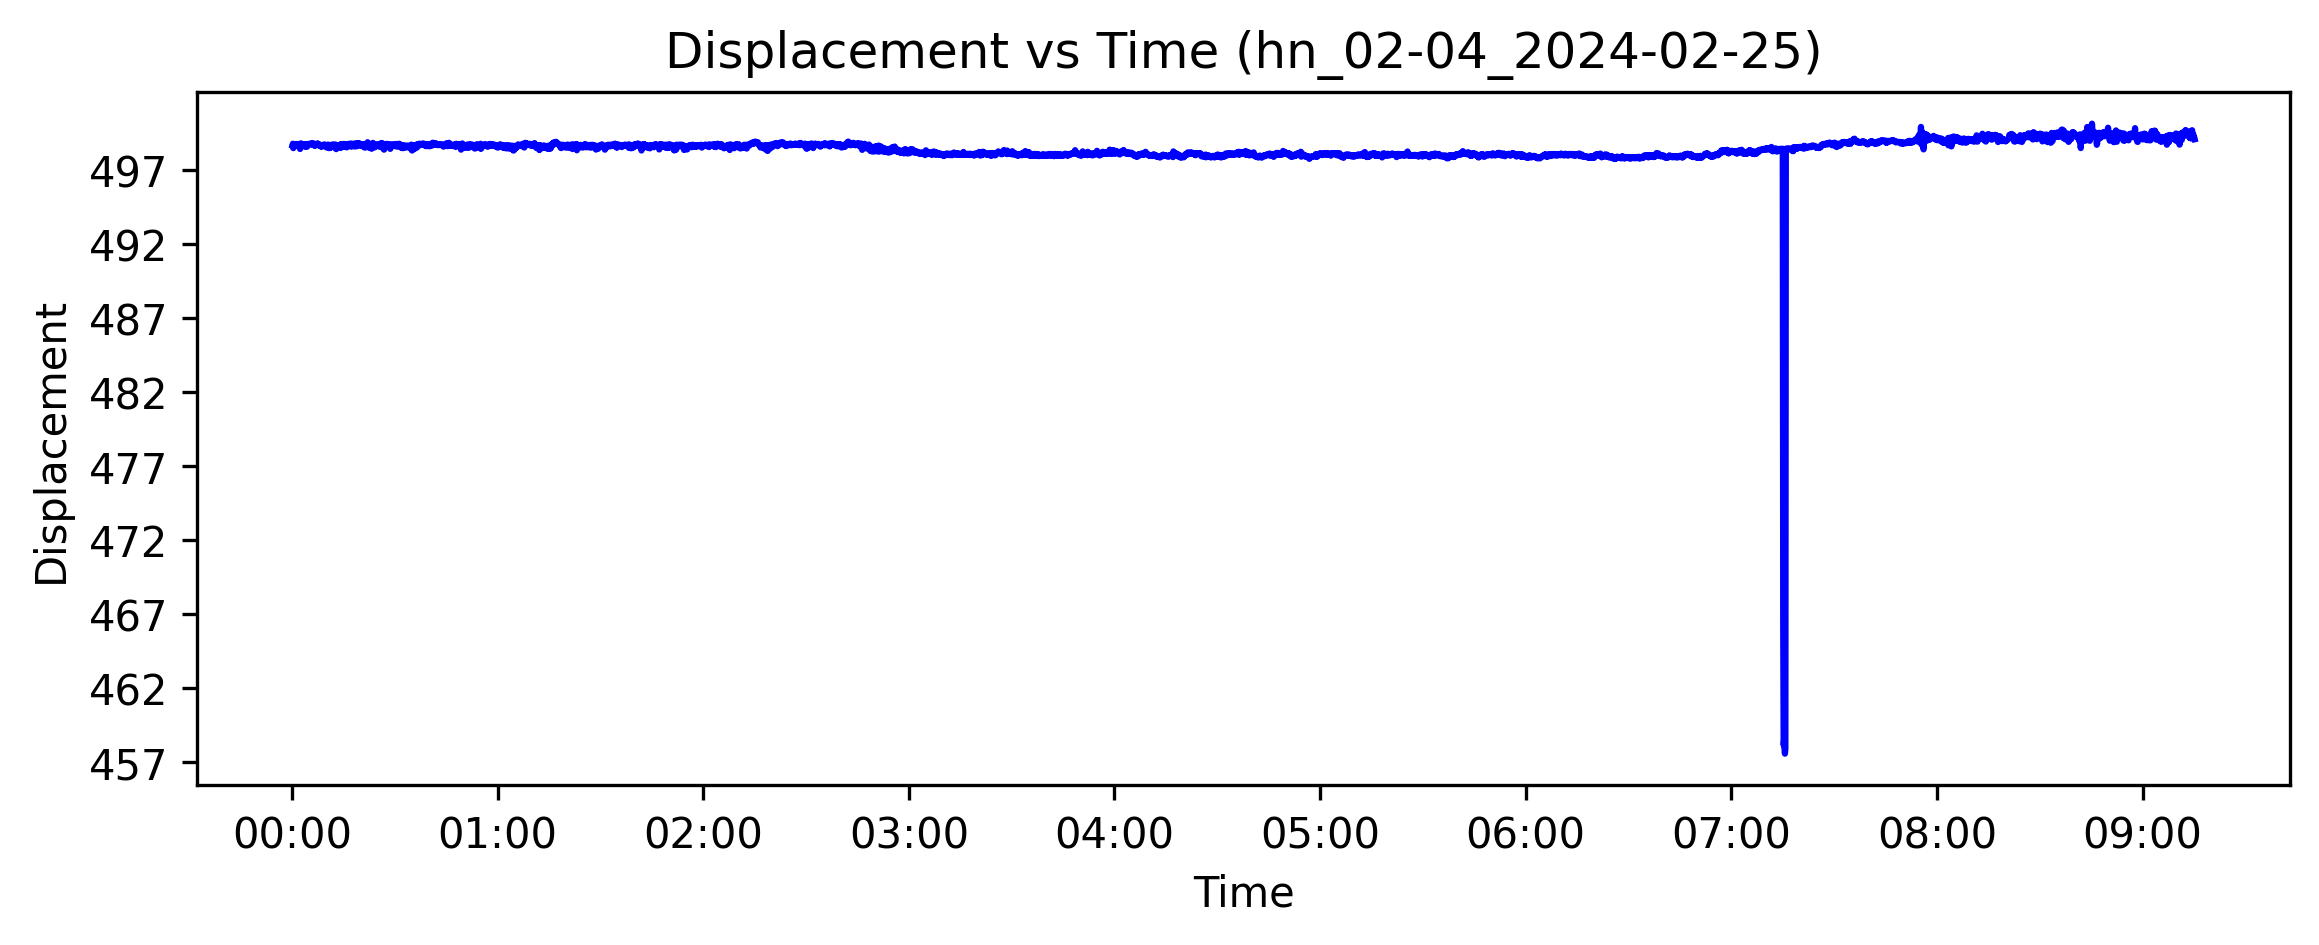

In [38]:
import matplotlib.dates as mdates
time_format = mdates.DateFormatter('%H:%M')

y_mean = df['y'].mean()

plt.plot(df.index, df['y'], 'b-')
# plt.text(df.index[0], y_mean, f'Mean: {y_mean:.2f}', fontsize=12, color='red')
# plt.text(df.index[0], y_mean + (df['y'].max() - df['y'].min()) * 0.05, f'Mean: {y_mean:.2f}', 
#          fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.6))
# plt.axhline(y_mean, color='r', linestyle='--')
plt.gca().xaxis.set_major_formatter(time_format)

plt.xlabel('Time')
plt.yticks(np.arange(int(df['y'].min()), int(df['y'].max())+2, 5))
plt.ylabel('Displacement')
plt.title(f'Displacement vs Time ({file_name})')
# plt.tight_layout()
plt.show()


In [42]:

import matplotlib.font_manager

# 获取系统中可用的字体列表
fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 打印所有可用字体的名称
for font in fonts:
    print(font)

/System/Library/Fonts/HelveticaNeue.ttc
/System/Library/Fonts/Supplemental/Baghdad.ttc
/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc
/System/Library/Fonts/Supplemental/STIXIntDReg.otf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/8739f5cf483d3b2f04cbb451d310b68f0cf880d0.asset/AssetData/ToppanBunkyuMinchoPr6N-Regular.otf
/System/Library/Fonts/Supplemental/Raanana.ttc
/System/Library/Fonts/Menlo.ttc
/System/Library/Fonts/Supplemental/NotoSansOlChiki-Regular.ttf
/System/Library/Fonts/NewYork.ttf
/Users/youkipepper/Library/Fonts/lmroman12-italic.otf
/System/Library/Fonts/Supplemental/NotoSansWancho-Regular.ttf
/System/Library/Fonts/Supplemental/NotoSansPsalterPahlavi-Regular.ttf
/System/Library/Fonts/Supplemental/Skia.ttf
/System/Library/Fonts/Supplemental/Phosphate.ttc
/Users/youkipepper/Library/Fonts/lmromandunh10-regular.otf
/System/Library/Fonts/Avenir Next Condensed.ttc
/Users/youkipepper/Library/Fonts/lmsansquot8-boldoblique.otf
/Users/youkipepper/Library/Fonts/lmsansdemicond10-obl